In [1]:
library("MASS")
library("car")
library("leaps")
library("tidyverse")

Loading required package: carData

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::recode() masks car::recode()
x dplyr::select() masks MASS::select()
x purrr::some()   masks car::some()



In [2]:
# read the dataset and look at the raw data
BodyFat <- read_csv("https://raw.githubusercontent.com/JumpyJumpy/stat628-module2/master/data/BodyFat.csv", show_col_types = FALSE)
summary(BodyFat)

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

In [3]:
# unit conversion

BodyFat$HEIGHT <- BodyFat$HEIGHT / 0.3937

In [4]:
## remove bad data points, drop density, BMI

BodyFat_cleaned <- BodyFat[-c(42, 172, 182, 39), -c(1, 3, 7)]

In [5]:
## initial model

lm_model1 <- lm(BODYFAT ~ ., data = BodyFat_cleaned)
summary(lm_model1)
corr <- cor(BodyFat_cleaned[, -1]) ## notice strong correlation on weight with other terms
vif(lm_model1) ## weight is dropped due to high vif
head(BodyFat_cleaned)


Call:
lm(formula = BODYFAT ~ ., data = BodyFat_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2213  -2.9122  -0.2092   2.7937   9.0525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.472956  21.743796   0.390 0.697133    
AGE          0.060236   0.029721   2.027 0.043825 *  
WEIGHT      -0.006632   0.062174  -0.107 0.915141    
HEIGHT      -0.106991   0.069752  -1.534 0.126410    
NECK        -0.355217   0.216123  -1.644 0.101605    
CHEST       -0.119275   0.100902  -1.182 0.238369    
ABDOMEN      0.831724   0.084211   9.877  < 2e-16 ***
HIP         -0.149154   0.134328  -1.110 0.267979    
THIGH        0.137594   0.136264   1.010 0.313653    
KNEE        -0.054155   0.226173  -0.239 0.810975    
ANKLE        0.168222   0.202544   0.831 0.407078    
BICEPS       0.132922   0.158052   0.841 0.401204    
FOREARM      0.254133   0.190814   1.332 0.184210    
WRIST       -1.642768   0.490803  -3.347 0.000951 ***
---
Signif. co

AGE    WEIGHT    HEIGHT      NECK     CHEST   ABDOMEN       HIP     THIGH 
 2.289364 44.287218  3.431741  3.878993 10.622414 11.615977 11.782841  6.994775 
     KNEE     ANKLE    BICEPS   FOREARM     WRIST 
 4.316814  1.789414  3.340984  2.375751  3.193492

BODYFAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,172.0853,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,183.5154,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,168.2753,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,183.5154,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,180.9754,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,189.8654,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [6]:
## best subset selection

best_subset <- regsubsets(BODYFAT ~ . - WEIGHT, data = BodyFat_cleaned, nvmax = 100)
summary(best_subset)
summary(best_subset)$bic
summary(best_subset)$adjr2  ## (3) & (4) are candidates of optimal model since it has lowest BIC and a relatively high R^2

Subset selection object
Call: regsubsets.formula(BODYFAT ~ . - WEIGHT, data = BodyFat_cleaned, 
    nvmax = 100)
12 Variables  (and intercept)
        Forced in Forced out
AGE         FALSE      FALSE
HEIGHT      FALSE      FALSE
NECK        FALSE      FALSE
CHEST       FALSE      FALSE
ABDOMEN     FALSE      FALSE
HIP         FALSE      FALSE
THIGH       FALSE      FALSE
KNEE        FALSE      FALSE
ANKLE       FALSE      FALSE
BICEPS      FALSE      FALSE
FOREARM     FALSE      FALSE
WRIST       FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: exhaustive
          AGE HEIGHT NECK CHEST ABDOMEN HIP THIGH KNEE ANKLE BICEPS FOREARM
1  ( 1 )  " " " "    " "  " "   "*"     " " " "   " "  " "   " "    " "    
2  ( 1 )  " " " "    " "  " "   "*"     " " " "   " "  " "   " "    " "    
3  ( 1 )  " " "*"    " "  " "   "*"     " " " "   " "  " "   " "    " "    
4  ( 1 )  "*" "*"    " "  " "   "*"     " " " "   " "  " "   " "    " "    
5  ( 1 )  "*" "*"    " "  "*"   "*" 

[1] -262.8904 -290.6749 -300.7558 -300.0384 -297.1131 -293.7792 -290.5294
 [8] -286.1704 -281.8659 -277.0830 -272.2281 -266.7838

[1] 0.6672781 0.7078947 0.7245726 0.7287361 0.7304430 0.7316929 0.7330229
 [8] 0.7331509 0.7333328 0.7329954 0.7325751 0.7315119


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST + HEIGHT, data = BodyFat_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2625 -2.9578 -0.1882  2.8937  8.9635 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.12688    7.30834   1.522    0.129    
ABDOMEN      0.71369    0.03107  22.970  < 2e-16 ***
WRIST       -1.57409    0.36911  -4.265 2.87e-05 ***
HEIGHT      -0.16477    0.04141  -3.979 9.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.958 on 244 degrees of freedom
Multiple R-squared:  0.7279,	Adjusted R-squared:  0.7246 
F-statistic: 217.6 on 3 and 244 DF,  p-value: < 2.2e-16


ABDOMEN    WRIST   HEIGHT 
1.547940 1.768148 1.183760

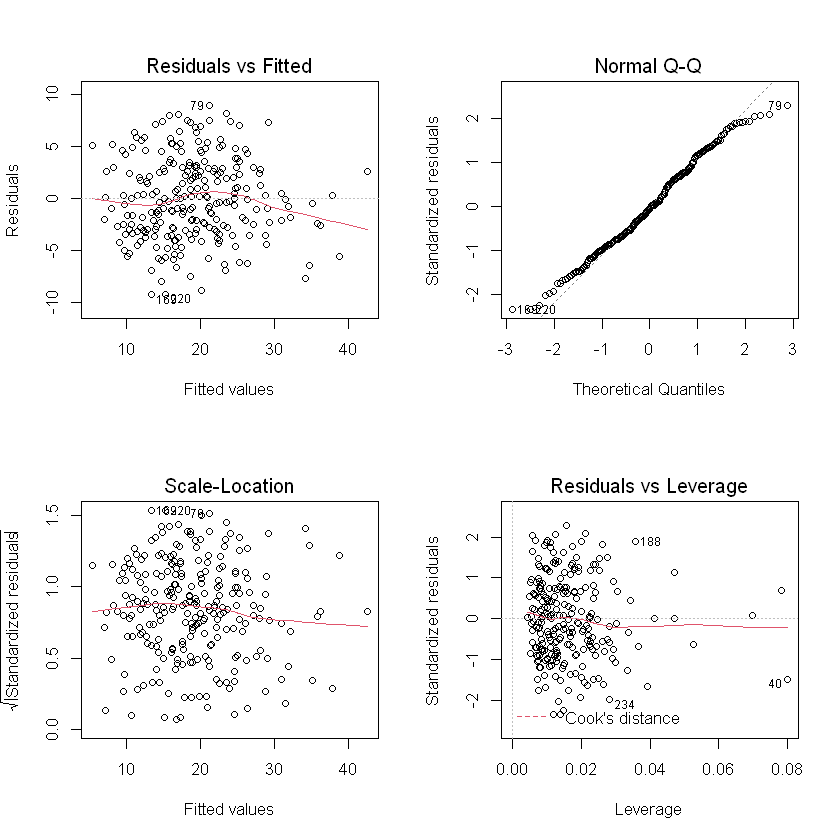

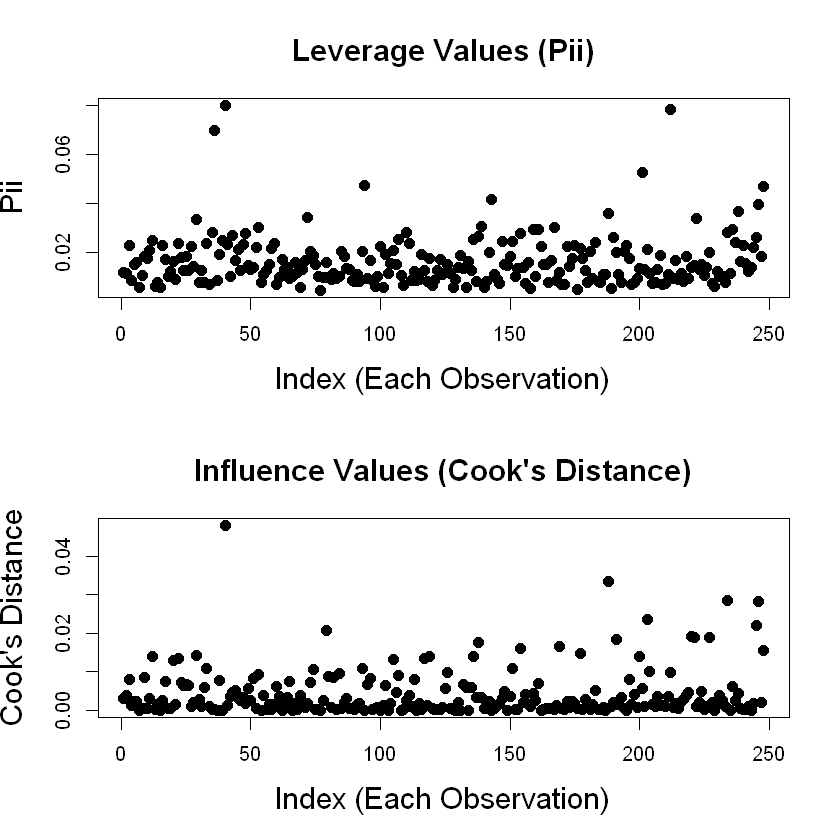

In [7]:
## model candidates

final_3 <- lm(BODYFAT ~ ABDOMEN + WRIST + HEIGHT, data = BodyFat_cleaned)  ## three predictors
summary(final_3)
vif(final_3)
par(mfrow = c(2, 2))
plot(final_3, ask = F)

## plot the leverage ponints and influential points
lmmodel = final_3
  pii = hatvalues(lmmodel)
  hat_max_index <- which.max(pii)
  cooki = cooks.distance(lmmodel)
  par(mfrow = c(2, 1))
  n = dim(BodyFat_cleaned)[1]
  plot(
    1:n,
    pii,
    type = "p",
    pch = 19,
    cex = 1.2,
    cex.lab = 1.5,
    cex.main = 1.5,
    xlab = "Index (Each Observation)",
    ylab = "Pii",
    main = "Leverage Values (Pii)"
  )
  plot(
    1:n,
    cooki,
    type = "p",
    pch = 19,
    cex = 1.2,
    cex.lab = 1.5,
    cex.main = 1.5,
    xlab = "Index (Each Observation)",
    ylab = "Cook's Distance",
    main = "Influence Values (Cook's Distance)"
  )


Call:
lm(formula = BODYFAT ~ ABDOMEN + HEIGHT + WRIST + AGE, data = BodyFat_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7296 -2.8671 -0.3517  2.9719  8.5195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.82824    7.51656   0.908  0.36455    
ABDOMEN      0.70543    0.03107  22.707  < 2e-16 ***
HEIGHT      -0.12925    0.04421  -2.924  0.00378 ** 
WRIST       -1.76208    0.37634  -4.682 4.72e-06 ***
AGE          0.04774    0.02192   2.178  0.03034 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.928 on 243 degrees of freedom
Multiple R-squared:  0.7331,	Adjusted R-squared:  0.7287 
F-statistic: 166.9 on 4 and 243 DF,  p-value: < 2.2e-16


ABDOMEN   HEIGHT    WRIST      AGE 
1.571368 1.370115 1.866288 1.237426

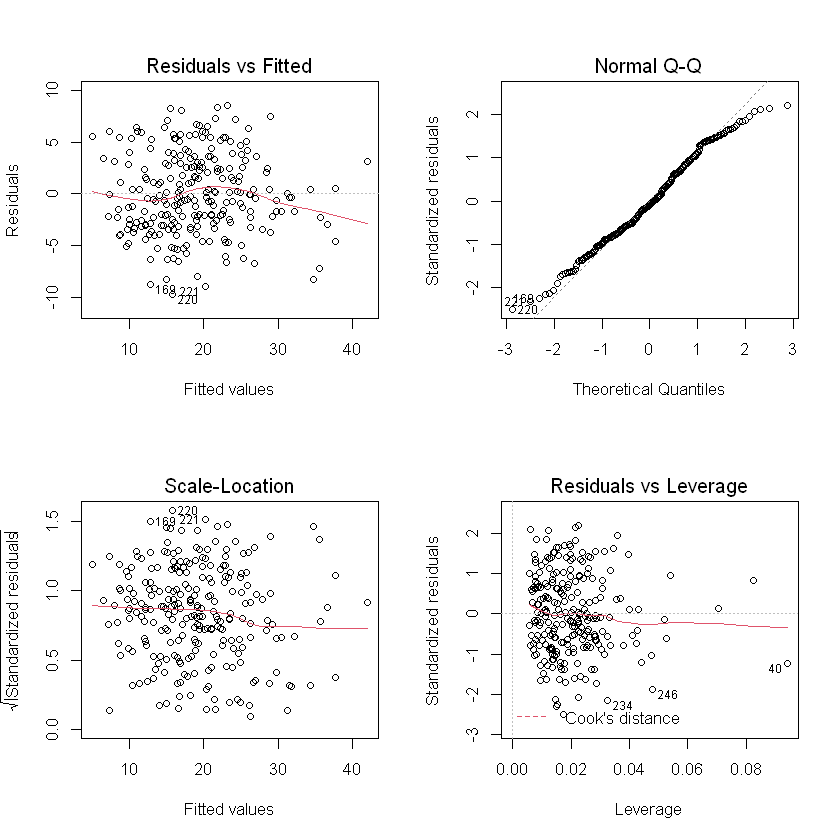

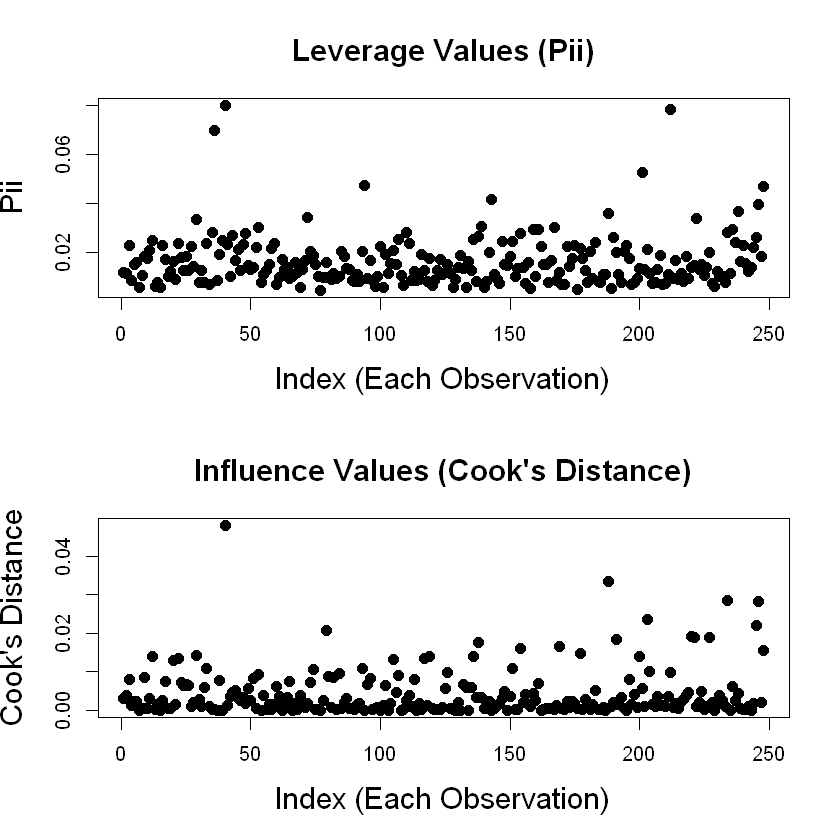

In [8]:
## model candidates

final_4 <- lm(BODYFAT ~ ABDOMEN + HEIGHT + WRIST + AGE, data = BodyFat_cleaned)  ## four predictors
summary(final_4)
vif(final_4)
par(mfrow = c(2, 2))
plot(final_4, ask = F)

## plot the leverage ponints and influential points
lmmodel = final_3
  pii = hatvalues(lmmodel)
  hat_max_index <- which.max(pii)
  cooki = cooks.distance(lmmodel)
  par(mfrow = c(2, 1))
  n = dim(BodyFat_cleaned)[1]
  plot(
    1:n,
    pii,
    type = "p",
    pch = 19,
    cex = 1.2,
    cex.lab = 1.5,
    cex.main = 1.5,
    xlab = "Index (Each Observation)",
    ylab = "Pii",
    main = "Leverage Values (Pii)"
  )
  plot(
    1:n,
    cooki,
    type = "p",
    pch = 19,
    cex = 1.2,
    cex.lab = 1.5,
    cex.main = 1.5,
    xlab = "Index (Each Observation)",
    ylab = "Cook's Distance",
    main = "Influence Values (Cook's Distance)"
  )